# Programming Challenge

#Die Daten, welche in dieser Challenge verwendet werden sollen, finden Sie in der Datei vehicle_data.xlsx. 
Bitte beachten Sie, dass die Daten zunächst aufbereitet werden müssen, also noch nicht in einer Qualität vorliegen, die eine 
nale Insight-Generierung ermöglicht.
Die Quelldatei vehicle_data.xlsx beinhaltet Daten zu 500 Fahrzeugen:
Im Reiter sales code finden Sie 500 Trucks deren eindeutige Fahrzeugidentifikationsnummer (FIN) als hash in der 
Spalte h_vehicle_hash dargestellt ist. Jedes Fahrzeug ist aufgeschlüsselt nach Produktionsdatum, Land in welches 
das Fahrzeug verkauft wurde und sales_code_array. Letztere Spalte beinhaltet Codes, welche die genaue 
Zusammensetzung des Fahrzeuges beschreiben. Im Reiter engines finden Sie 9 sales Codes, die Aufschluss darüber 
geben, welcher Motor im entsprechenden Fahrzeug verbaut ist. Mit der Tabelle vehicle_hash können Sie die gehashte 
FIN zurück in die originale Darstellung
 mappen.

Die Challenge teilt sich in zwei Aufgabenteile ein. Der erste Teil zielt auf ihre Softwareentwicklungsfertigkeiten
ab. Halten Sie bei der Code Gestaltung die gängigsten Clean Code Regeln ein und verfolgen Sie nach Möglichkeit eine
testgetriebene Entwicklung. Im zweiten Aufgabenteil sollen Sie verschiedene Analysen durchführen. Verwenden Sie 
dazu die Daten, welche Sie in Aufgabenteil eins aufbereitet haben.

Bevor Sie starten, bietet es sich an sich zunächst mit den Datenätzen vertraut zu machen. Verschaffen Sie sich 
einen Überblick und erkunden Sie die Zusammenhänge der Datensätze.
*  

 verbauter Motor, Leistungsklasse, Kabinentyp und weitere Merkmale OM924, OM926, etc . . .
17 stellige Buchstaben-Zahlenkombination

#Aufgabe 1: 
Data Engineering
Schreiben Sie eine ETL Pipeline zur Datenaufbereitung. Gehen Sie dabei wie folgt vor.
 Daten laden
 Daten bereinigen und aufbereiten  Daten zusammenführen
 Gesamttabelle bestehend aus folgenden Spalten abspeichern:
 fin
 production_date 
 country
 sales_code_array

#Aufgabe 2: Data Science
Analysieren Sie den die Daten, indem Sie folgende Fragestellungen auswerten.
Visualisieren Sie ihre Ergebnisse.

 Welches sind die top drei Länder, in die wir zwischen 01.01.2014 und 31.12.2020 am meisten Fahrzeuge verkauft haben.
 In welchem dieser Jahre haben wir insgesamt am meisten Fahrzeuge verkauft?
 Welche FIN hat das zeitlich erste verkaufte Fahrzeug.
 Wie viele Fahrzeuge wurden zwischen 01.01.2017 und 01.01.2021 mit OM934, OM936, OM470 und OM471 Motoren verkauft.
 Welche Fahrzeuge (FIN) wurden zwischen 01.01.2017 und 01.01.2021 und mit OM936 Motor nach Neuseeland verkauft.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os

In [3]:
os.getcwd()

'/Users/sebastiangurgel/Desktop/Seba Python/Jannik vehicle praxis challenge 1:23'

# Tabellenblatt 1 öffnen, prüfen, bereinigen

In [4]:
sales_codes=pd.read_excel("vehicle_data.xlsx", sheet_name=("sales_codes"))

In [5]:
sales_codes.tail()

,Unnamed: 0,h_vehicle_hash,production_date,country,sales_code_array
495,0,e97bca74b48c8e2e809dea1814ea647d057d9df1,2015-06-09 00:00:00,Qatar,"Z5F, M3V, N8K, Q2E, X3I, F5Q, D7F, E3T, D0B, D..."
496,0,e7d817628ed1f07aef4fa8d6b7cd7a1c0419c5c3,2019-08-22 00:00:00,Costa Rica,"Z5E, M3A, Q2V, Q4X, B1D, R2J, P9T, F6A, E2I, I..."
497,0,d7b0f243d9c87c1519638fd687f171f18878def4,2018-05-03 00:00:00,Germany,"Z5L, M3J, A4M, P6Y, C7E, A1H, V6G, D5N, E0N, K..."
498,0,73fa5ea52299d19c5bc2323d96458de6dd2cc48a,2016-04-11 00:00:00,Algeria,"Z5E, M3B, U3M, J2O, I5B, Z0M, X2C, I6P, I1C, V..."
499,0,e4d588f7a964377ce7cf047ecdec806b03f7a356,2012-09-25 00:00:00,Germany,"Z5C, M2F, E5A, W2A, N8H, J2E, D9Y, L9B, U2S, C..."


In [6]:
sales_codes["production_date"]=pd.to_datetime(sales_codes["production_date"], errors="coerce")

In [7]:
sales_codes.dtypes

Unnamed: 0                   int64
h_vehicle_hash              object
production_date     datetime64[ns]
country                     object
sales_code_array            object
dtype: object

In [8]:
sales_codes.sort_values("production_date", ascending=True,inplace=True)

In [9]:
sales_codes.isnull( ).sum( )

Unnamed: 0           0
h_vehicle_hash       5
production_date      6
country             10
sales_code_array     0
dtype: int64

In [10]:
sales_codes.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [11]:
sales_codes.isnull( ).sum( )

Unnamed: 0          0
h_vehicle_hash      0
production_date     0
country             0
sales_code_array    0
dtype: int64

sales_codes.shape

# Die Spalte 'productions_date' enthält Fehler:

In [13]:
sales_codes[(sales_codes["production_date"] < "2011-01-25") | (sales_codes["production_date"] > "2021-12-31")]


,Unnamed: 0,h_vehicle_hash,production_date,country,sales_code_array
249,0,fb69ec4981c34392ff3cd437b020dfa78f2baad4,1850-08-25,Kaimcratic Iepublic of Critisch,"Z5B, M1K, W1A, O0E, V4A, H2G, Q1H, W8E, V2M, M..."
193,0,bc15b6297e80226461940148c48b4a219ed1d832,1899-05-06,Uganda,"Z5L, M3H, O4G, Z9C, E8A, D1M, V2C, R2L, A3B, R..."
178,0,bcc1f439139e9f436a4c2b8ae106e61eff54aa40,1910-03-10,New Caledonia,"Z5C, M2D, I1W, F5L, V6H, F2T, O1A, I1G, W3B, Q..."
294,0,3123bda5939157c24d95110d5173e059a15d8205,2055-09-05,Czechia,"Z5L, M3I, K1S, S1I, B3G, W5M, Z9F, N1G, C3A, V..."


In [14]:
# Löschen der fehlerhaften Datumszeilen:
sales_codes.drop(index=[193, 178,294,249], inplace=True)

In [15]:
sales_codes.head(3)

,Unnamed: 0,h_vehicle_hash,production_date,country,sales_code_array
468,0,067ecbfc7cdeab1abfb340d1e3a99463966920c4,2011-01-26,Chad,"Z5D, M2S, P9B, W9S, F6P, D7N, Z3K, V5A, O7B, A..."
202,0,5e001b6fd94922709a5f23c881c737fe28668b3e,2011-02-15,Thailand,"Z5D, M2N, N2I, F9W, Q0N, K7R, A5M, V6T, R5M, Z..."
251,0,8b95dc5e5dc3dfb9465dfc2c2a0a3b9ccefd7bd1,2011-02-17,Egypt,"Z5E, M3D, P8Y, X4E, V6R, E3E, W7F, E3Z, C3P, C..."


# Tabellenblatt 2 öffnen, prüfen, bereinigen

In [16]:
vehicle_hash=pd.read_excel("vehicle_data.xlsx", sheet_name=("vehicle_hash"))

In [17]:
vehicle_hash.head(3)

,Unnamed: 0,h_vehicle_hash,fin,record_source,load_ts
0,0,924d229bede272c5a3b440c464cd1dfb74cae74d,WEB14561113188001,vedoc,2021-11-26 12:22:39.105133
1,0,3787a8db036dabd7433a32eaeeca8e5758bc3df8,W1T61600516560507,vedoc,2021-11-26 12:22:39.106127
2,0,aea31cdf4f575acf190626a50e927547e683d2ac,WEB74212637167838,vedoc,2021-11-26 12:22:39.106862


In [18]:
vehicle_hash.shape

(500, 5)

In [19]:
vehicle_hash.dtypes

Unnamed: 0         int64
h_vehicle_hash    object
fin               object
record_source     object
load_ts           object
dtype: object

In [20]:
vehicle_hash.isnull( ).sum( )

Unnamed: 0        0
h_vehicle_hash    0
fin               0
record_source     0
load_ts           0
dtype: int64

# Prüfung, ob die Fins immer  17-stellig ist!

In [21]:
vehicle_hash[vehicle_hash["fin"].str.len()!=17]

,Unnamed: 0,h_vehicle_hash,fin,record_source,load_ts
86,0,b820055eeacc6767f2d9cb7c3c0efccff6688186,NMB7057091351743,vedoc,2021-11-26 12:22:39.157507
115,0,b23b13902d1cd36b3a463347e0d54ab519b872d6,NM97254,vedoc,2021-11-26 12:22:39.174319
144,0,d7dc551dbd7311612b120a7170ca73dc8e22f6db,W,vedoc,2021-11-26 12:22:39.191123
166,0,920605e523c7c51a6dc05148c2850a3ea011925d,42328400461785,vedoc,2021-11-26 12:22:39.203845
457,0,9196d2b34cdc15cb8596a7cbfe8aebab9942ee95,MB60225250190773,vedoc,2021-11-26 12:22:39.374199
494,0,638b2c1128f0ac139ede4b8bf39a6741c04ffae0,WEB46,vedoc,2021-11-26 12:22:39.395260


In [22]:
# Löschen der fehlerhaften fin-Zeilen:
vehicle_hash.drop(index=[86,115,144,166,457,494], inplace=True)

In [23]:
vehicle_hash.shape

(494, 5)

# Tabellenblatt 3 öffnen, prüfen, bereinigen

In [24]:
engines=pd.read_excel("vehicle_data.xlsx", sheet_name=("engines"))

In [25]:
engines.rename(columns = {'Code Description De':'motor_code'}, inplace = True)
engines.head()

,Code Group Id,Code Group Name En,Code Group Name De,Folder Name,Sales Code,Code Description En,motor_code
0,131,powertrain engine series,motor baureihe,06 Powertrain,M0I,OM 924,OM 924
1,131,powertrain engine series,motor baureihe,06 Powertrain,M0J,OM 926,OM 926
2,131,powertrain engine series,motor baureihe,06 Powertrain,Z5A,M 936G,M 936G
3,131,powertrain engine series,motor baureihe,06 Powertrain,Z5B,OM 934,OM 934
4,131,powertrain engine series,motor baureihe,06 Powertrain,Z5C,OM 936,OM 936


In [26]:
engines.shape

(9, 7)

In [27]:
engines.dtypes

Code Group Id           int64
Code Group Name En     object
Code Group Name De     object
Folder Name            object
Sales Code             object
Code Description En    object
motor_code             object
dtype: object

# Extracting den Sales Code aus dem sales_code_array irgendwo im array

In [28]:
sales_codes['Sales Code'] = sales_codes['sales_code_array'].str.extract(r'(Z5\w{1})', expand=False)

In [29]:
sales_codes.head()

,Unnamed: 0,h_vehicle_hash,production_date,country,sales_code_array,Sales Code
468,0,067ecbfc7cdeab1abfb340d1e3a99463966920c4,2011-01-26,Chad,"Z5D, M2S, P9B, W9S, F6P, D7N, Z3K, V5A, O7B, A...",Z5D
202,0,5e001b6fd94922709a5f23c881c737fe28668b3e,2011-02-15,Thailand,"Z5D, M2N, N2I, F9W, Q0N, K7R, A5M, V6T, R5M, Z...",Z5D
251,0,8b95dc5e5dc3dfb9465dfc2c2a0a3b9ccefd7bd1,2011-02-17,Egypt,"Z5E, M3D, P8Y, X4E, V6R, E3E, W7F, E3Z, C3P, C...",Z5E
484,0,a05a20c0670600f828c76efcc9321bd272e49e21,2011-02-21,Mali,"Z5D, M2R, Q4T, W4L, I8Z, I6L, U0A, R0S, Y1G, F...",Z5D
274,0,8e87ca5ff59a5d0a94711234a53364d97691be5b,2011-02-24,Hong Kong,"Z5B, M1I, E5J, F8M, D9H, Y1E, P1D, P0S, Q6G, W...",Z5B


In [30]:
# Merge "sales_codes" mit "engines" um an die Motordaten zu kommen!!!
sales_merged = pd.merge(left=sales_codes, right=engines, how="left", on="Sales Code")

In [31]:
sales_merged.head(3)

,Unnamed: 0,h_vehicle_hash,production_date,country,sales_code_array,Sales Code,Code Group Id,Code Group Name En,Code Group Name De,Folder Name,Code Description En,motor_code
0,0,067ecbfc7cdeab1abfb340d1e3a99463966920c4,2011-01-26,Chad,"Z5D, M2S, P9B, W9S, F6P, D7N, Z3K, V5A, O7B, A...",Z5D,131,powertrain engine series,motor baureihe,06 Powertrain,OM 470,OM 470
1,0,5e001b6fd94922709a5f23c881c737fe28668b3e,2011-02-15,Thailand,"Z5D, M2N, N2I, F9W, Q0N, K7R, A5M, V6T, R5M, Z...",Z5D,131,powertrain engine series,motor baureihe,06 Powertrain,OM 470,OM 470
2,0,8b95dc5e5dc3dfb9465dfc2c2a0a3b9ccefd7bd1,2011-02-17,Egypt,"Z5E, M3D, P8Y, X4E, V6R, E3E, W7F, E3Z, C3P, C...",Z5E,131,powertrain engine series,motor baureihe,06 Powertrain,OM 471,OM 471


In [32]:
# Merge "sales_codes" und "vehicle_hash" mit "h_vehicle_hash"
df_merged = pd.merge(left=sales_merged, right=vehicle_hash, how="left", on="h_vehicle_hash")

In [33]:
df_merged.head(3)

,Unnamed: 0_x,h_vehicle_hash,production_date,country,sales_code_array,Sales Code,Code Group Id,Code Group Name En,Code Group Name De,Folder Name,Code Description En,motor_code,Unnamed: 0_y,fin,record_source,load_ts
0,0,067ecbfc7cdeab1abfb340d1e3a99463966920c4,2011-01-26,Chad,"Z5D, M2S, P9B, W9S, F6P, D7N, Z3K, V5A, O7B, A...",Z5D,131,powertrain engine series,motor baureihe,06 Powertrain,OM 470,OM 470,0.0,WEB36004609995198,vedoc,2021-11-26 12:22:39.380411
1,0,5e001b6fd94922709a5f23c881c737fe28668b3e,2011-02-15,Thailand,"Z5D, M2N, N2I, F9W, Q0N, K7R, A5M, V6T, R5M, Z...",Z5D,131,powertrain engine series,motor baureihe,06 Powertrain,OM 470,OM 470,0.0,WDB51365356505806,vedoc,2021-11-26 12:22:39.224951
2,0,8b95dc5e5dc3dfb9465dfc2c2a0a3b9ccefd7bd1,2011-02-17,Egypt,"Z5E, M3D, P8Y, X4E, V6R, E3E, W7F, E3Z, C3P, C...",Z5E,131,powertrain engine series,motor baureihe,06 Powertrain,OM 471,OM 471,0.0,NMB95308052202666,vedoc,2021-11-26 12:22:39.253534


In [34]:
df_merged.shape

(475, 16)

In [35]:
df_merged.columns

Index(['Unnamed: 0_x', 'h_vehicle_hash', 'production_date', 'country',
       'sales_code_array', 'Sales Code', 'Code Group Id',
       'Code Group Name En ', 'Code Group Name De ', 'Folder Name',
       'Code Description En', 'motor_code', 'Unnamed: 0_y', 'fin',
       'record_source', 'load_ts'],
      dtype='object')

In [36]:
neu=df_merged[['production_date','country','fin', 'motor_code',
       'sales_code_array']]

In [37]:
neu.head(3)

,production_date,country,fin,motor_code,sales_code_array
0,2011-01-26,Chad,WEB36004609995198,OM 470,"Z5D, M2S, P9B, W9S, F6P, D7N, Z3K, V5A, O7B, A..."
1,2011-02-15,Thailand,WDB51365356505806,OM 470,"Z5D, M2N, N2I, F9W, Q0N, K7R, A5M, V6T, R5M, Z..."
2,2011-02-17,Egypt,NMB95308052202666,OM 471,"Z5E, M3D, P8Y, X4E, V6R, E3E, W7F, E3Z, C3P, C..."


In [38]:
neu.shape

(475, 5)

# Aufgaben lösen:

In [39]:
# Welches sind die top drei Länder, in die wir zwischen 01.01.2014 und 31.12.2020 am meisten Fahrzeuge verkauft haben?

# In welchem dieser Jahre haben wir insgesamt am meisten Fahrzeuge verkauft? 

# Welche FIN hat das zeitlich erste verkaufte Fahrzeug?

# Wie viele Fahrzeuge wurden zwischen 01.01.2017 und 01.01.2021 mit OM934, OM936, OM470 und OM471 Motoren verkauft?

# Welche Fahrzeuge (FIN) wurden zwischen 01.01.2017 und 01.01.2021 und mit OM936 Motor nach Neuseeland verkauft?

# Welches sind die top drei Länder, in die wir zwischen 01.01.2014 und 31.12.2020 am meisten Fahrzeuge verkauft haben?¶

In [40]:
neu.head(3)

,production_date,country,fin,motor_code,sales_code_array
0,2011-01-26,Chad,WEB36004609995198,OM 470,"Z5D, M2S, P9B, W9S, F6P, D7N, Z3K, V5A, O7B, A..."
1,2011-02-15,Thailand,WDB51365356505806,OM 470,"Z5D, M2N, N2I, F9W, Q0N, K7R, A5M, V6T, R5M, Z..."
2,2011-02-17,Egypt,NMB95308052202666,OM 471,"Z5E, M3D, P8Y, X4E, V6R, E3E, W7F, E3Z, C3P, C..."


In [41]:
top_countries = neu[(neu['production_date'] >= '2014-01-01') & (neu['production_date'] <= '2020-12-31')].groupby('country')['fin'].count().nlargest(3)


In [42]:
top_countries

country
Germany       80
Costa Rica     4
Dominica       4
Name: fin, dtype: int64

# Zwischen dem 1.1.2014 und 31.12.2020 wurden 81 Fahrzeuge nach Deutschland und jeweils 4 nach Costa Rica und in die dominikanische Republik verkauft.

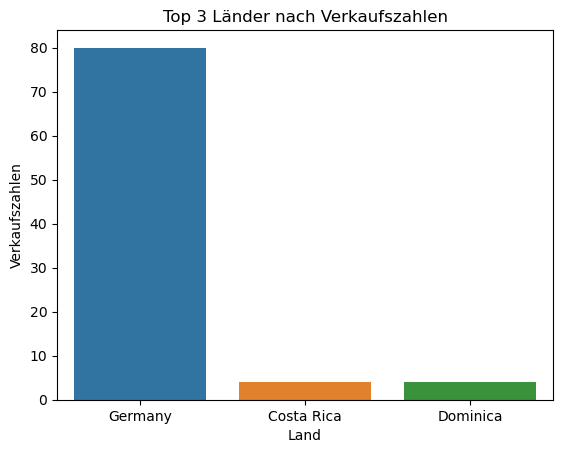

In [43]:
sns.barplot(x=top_countries.index, y=top_countries.values)
# Set the plot title, x-label, and y-label
plt.title('Top 3 Länder nach Verkaufszahlen')
plt.xlabel('Land')
plt.ylabel('Verkaufszahlen')

# Show the plot
plt.show()

---

# In welchem dieser Jahre haben wir insgesamt am meisten Fahrzeuge verkauft?

In [44]:
yearly_sales = neu[(neu['production_date'] >= '2014-01-01') & (neu['production_date'] <= '2020-12-31')].groupby(pd.Grouper(key='production_date', freq='Y'))['fin'].count()


In [45]:
yearly_sales

production_date
2014-12-31    40
2015-12-31    48
2016-12-31    46
2017-12-31    52
2018-12-31    39
2019-12-31    36
2020-12-31    29
Freq: A-DEC, Name: fin, dtype: int64

In [46]:
max_year = yearly_sales.idxmax().year
max_year

2017

# 2017 wurden mit 52 am meisten Fahrzeuge verkauft

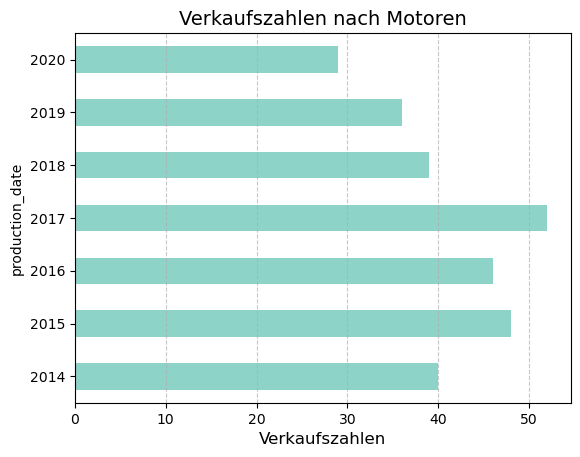

In [47]:
sns.set_palette('Set3')
yearly_sales.index = yearly_sales.index.strftime('%Y')

ax = yearly_sales.plot(kind='barh')

ax.set_title('Verkaufszahlen nach Motoren', fontsize=14)
ax.set_xlabel('Verkaufszahlen', fontsize=12)
#ax.set_ylabel('Jahr', fontsize=12)

ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

---


# Welche FIN hat das zeitlich erste verkaufte Fahrzeug?

In [48]:
earliest_fin = neu.sort_values(by='production_date')


In [49]:
earliest_fin.head(1)

,production_date,country,fin,motor_code,sales_code_array
0,2011-01-26,Chad,WEB36004609995198,OM 470,"Z5D, M2S, P9B, W9S, F6P, D7N, Z3K, V5A, O7B, A..."


# Das erste verkaufte Fahrzeug hat die FIN WEB36004609995198 und wurde am 26.1.2011 verkauft.

----

# Wie viele Fahrzeuge wurden zwischen 01.01.2017 und 01.01.2021 mit OM934, OM936, OM470 und OM471 Motoren verkauft?

In [50]:
motors = ['OM 934', 'OM 936', 'OM 470', 'OM 471']
sales_with_selected_motors = neu[neu['motor_code'].isin(motors) & neu['production_date'].between('2017-01-01', '2021-01-01')]
sales_by_motor = sales_with_selected_motors.groupby('motor_code')['fin'].count()

In [51]:
sales_by_motor

motor_code
OM 470    27
OM 471    25
OM 934    27
OM 936    26
Name: fin, dtype: int64

# Mit den entprechenden Motoren wurden zwischen 2017 und 2021 je nach Motortyp 26 oder 27 Fahrzeuge verkauft.

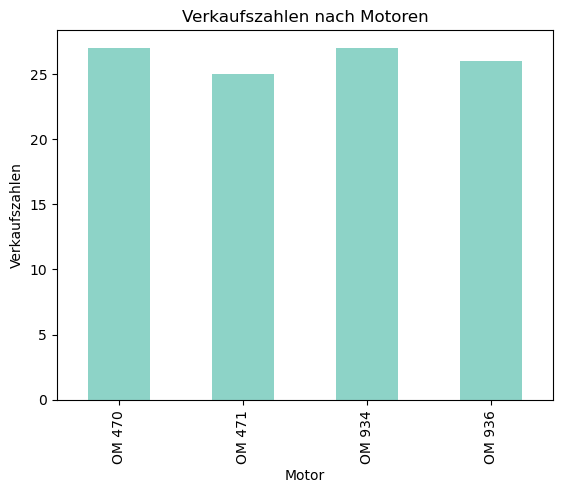

In [52]:
sales_by_motor.plot(kind='bar')

plt.title('Verkaufszahlen nach Motoren')
plt.xlabel('Motor')
plt.ylabel('Verkaufszahlen')

plt.show()

---

# Welche Fahrzeuge (FIN) wurden zwischen 01.01.2017 und 01.01.2021 und mit OM936 Motor nach Neuseeland verkauft?

In [53]:
filter_condition = (neu['production_date'] >= '2017-01-01') & (neu['motor_code'] == 'OM 936') & (neu['country'] == 'Neuseeland')
nz_sales = neu.loc[filter_condition]


In [54]:
nz_sales

,production_date,country,fin,motor_code,sales_code_array
401,2019-06-01,Neuseeland,NMB26186144147288,OM 936,"Z5C, M2D, T3P, Z1Q, Z7G, A6I, F0P, O4M, K2X, I..."


# Am 1.6.2019 wurde ein Fahrzeug mit der Motornummer OM 936 nach Neuseeland verkauft.